In [1]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier,\
                             StackingClassifier
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.linear_model import SGDClassifier, RidgeClassifier

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from utils import get_data, plot_cm, filter_columns

%matplotlib inline
pd.set_option('display.max_columns', 50)
matplotlib.rcParams['figure.figsize'] = [15, 15]

# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble

In [2]:
base_estimator = DTC(max_depth=15,
                     random_state=42,
                     #class_weight="balanced"
                    )

## RandomForestClassifier

In [3]:
XY_train, X_test_ori, inverse_target_map = get_data(min_size=None, min_size_test=None, nan_thresh=10, fill_nan=None)
train_columns = list(XY_train.columns)
train_columns.remove("TARGET_NUM")

min_max_scaler = MinMaxScaler(feature_range=(0, 10))
X_train_minmax = min_max_scaler.fit(XY_train[train_columns])
x_train = X_train_minmax.transform(XY_train[train_columns])

imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=-1)
imp_train = imp.fit(x_train)
x_train_full = imp_train.transform(x_train)

rs = RobustScaler()
rs_train = rs.fit(x_train)
x_train_full = rs_train.transform(x_train_full)

X_train, X_test, y_train, y_test = train_test_split(x_train_full, XY_train["TARGET_NUM"].values, test_size=0.3,
                                                    stratify=XY_train["TARGET_NUM"].values, random_state=42)

X_train = filter_columns(X_train)
X_test = filter_columns(X_test)

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   31.7s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:  1.5min finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    5.6s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:   15.1s finished


0.29893996565623226


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    2.3s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    6.5s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.


0.28135683707692405


[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    2.4s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    6.5s finished


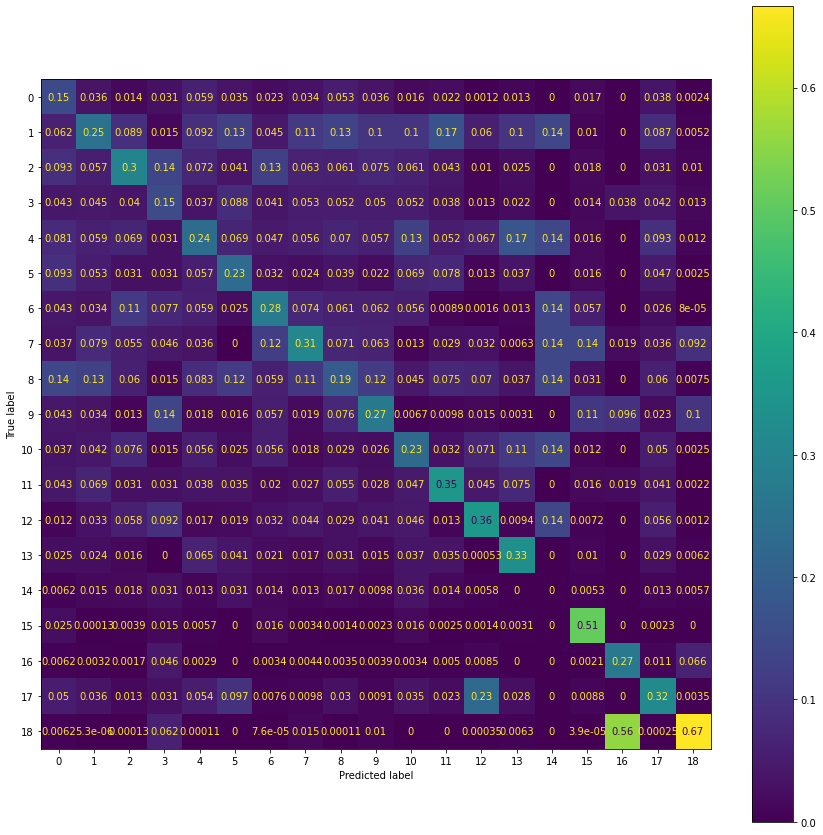

In [4]:
rfc = RandomForestClassifier(n_estimators=100,
                             max_depth=15,
                             #class_weight="balanced",
                             n_jobs=10,
                             verbose=1,
                             random_state=42)
rfc = rfc.fit(X_train, y_train)
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))
plot_cm(rfc, X_test, y_test)

## AdaBoostClassifier

In [ ]:
XY_train, X_test_ori, inverse_target_map = get_data(min_size=None, min_size_test=None, nan_thresh=10, fill_nan=None)
train_columns = list(XY_train.columns)
train_columns.remove("TARGET_NUM")

min_max_scaler = MinMaxScaler(feature_range=(0, 10))
X_train_minmax = min_max_scaler.fit(XY_train[train_columns])
x_train = X_train_minmax.transform(XY_train[train_columns])

imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=-1)
imp_train = imp.fit(x_train)
x_train_full = imp_train.transform(x_train)

rs = RobustScaler()
rs_train = rs.fit(x_train)
x_train_full = rs_train.transform(x_train_full)

X_train, X_test, y_train, y_test = train_test_split(x_train_full, XY_train["TARGET_NUM"].values, test_size=0.3,
                                                    stratify=XY_train["TARGET_NUM"].values, random_state=42)

0.3749260349026366
0.19622265128648636


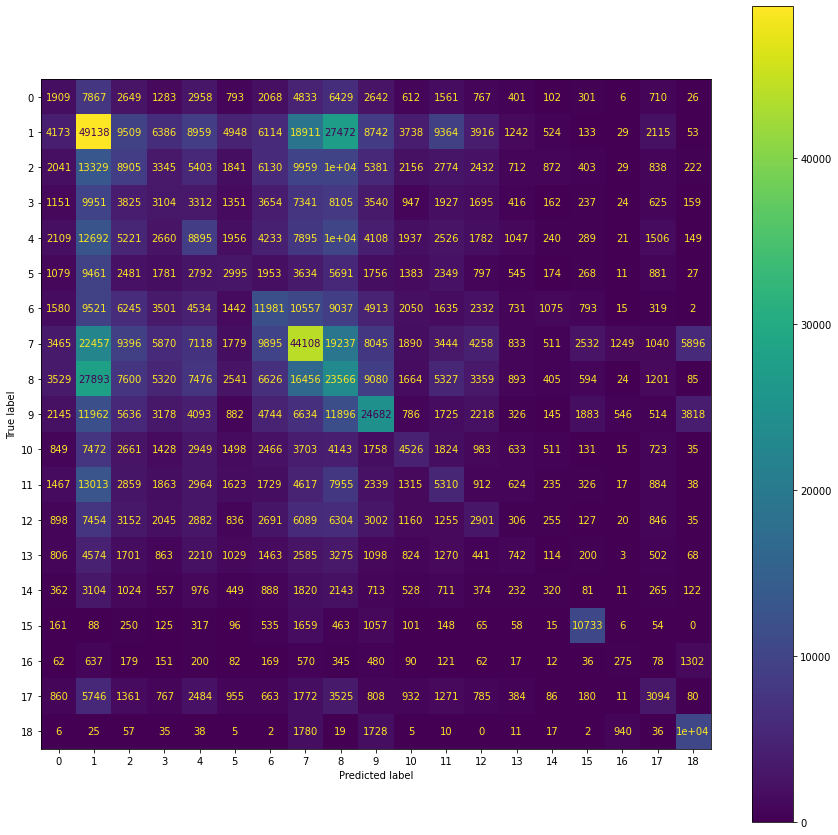

In [6]:
abc = AdaBoostClassifier(base_estimator=base_estimator,
                         n_estimators=100,
                         random_state=42)
abc = abc.fit(X_train, y_train)
print(abc.score(X_train, y_train))
print(abc.score(X_test, y_test))
plot_cm(abc, X_test, y_test)

## ExtraTreesClassifier

In [ ]:
XY_train, X_test, inverse_target_map = get_data(min_size=None, min_size_test=None, nan_thresh=10, fill_nan=None)
train_columns = list(XY_train.columns)
train_columns.remove("TARGET_NUM")

min_max_scaler = MinMaxScaler(feature_range=(0, 10))
X_train_minmax = min_max_scaler.fit(XY_train[train_columns])
x_train = X_train_minmax.transform(XY_train[train_columns])

imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=-1)
imp_train = imp.fit(x_train)
x_train_full = imp_train.transform(x_train)

rs = RobustScaler()
rs_train = rs.fit(x_train)
x_train_full = rs_train.transform(x_train_full)

X_train, X_test, y_train, y_test = train_test_split(x_train_full, XY_train["TARGET_NUM"].values, test_size=0.3,
                                                    stratify=XY_train["TARGET_NUM"].values, random_state=42)

X_train = filter_columns(X_train)
X_test = filter_columns(X_test)

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   20.1s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:   59.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    4.7s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:   13.4s finished


0.28298708069857836


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    2.1s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    6.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.


0.2737004147454217


[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    2.1s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    5.8s finished


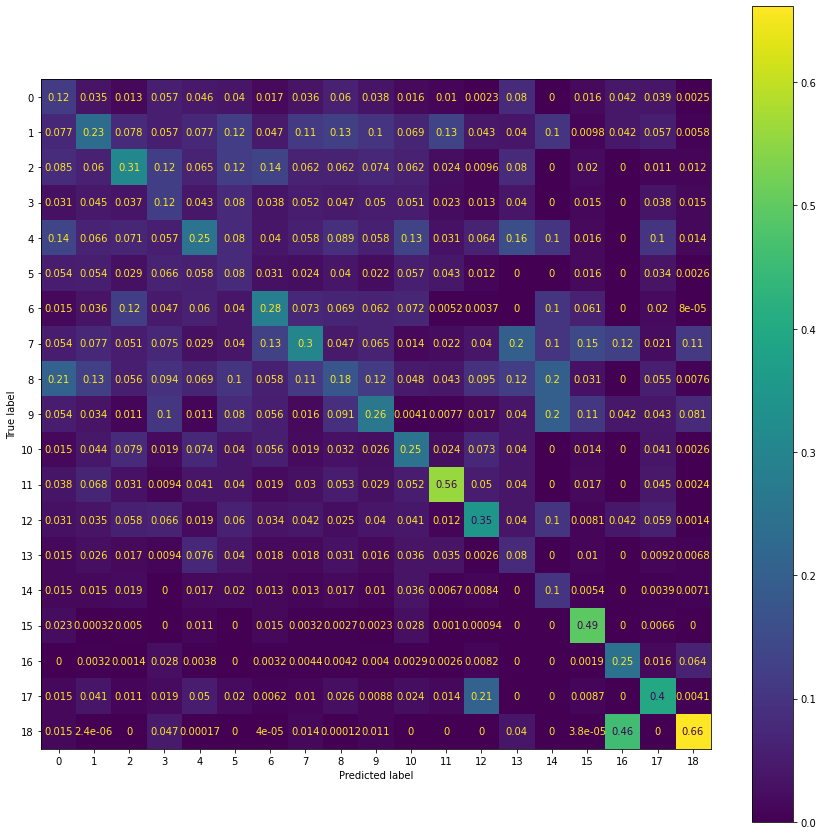

In [5]:
etc = ExtraTreesClassifier(n_estimators=100,
                           max_depth=15,
                           #class_weight="balanced",
                           n_jobs=10,
                           verbose=1,
                           random_state=42)
etc = etc.fit(X_train, y_train)
print(etc.score(X_train, y_train))
print(etc.score(X_test, y_test))
plot_cm(etc, X_test, y_test)

## BaggingClassifier

In [ ]:
XY_train, X_test_ori, inverse_target_map = get_data(min_size=None, min_size_test=None, nan_thresh=10, fill_nan=None)
train_columns = list(XY_train.columns)
train_columns.remove("TARGET_NUM")

min_max_scaler = MinMaxScaler(feature_range=(0, 10))
X_train_minmax = min_max_scaler.fit(XY_train[train_columns])
x_train = X_train_minmax.transform(XY_train[train_columns])

imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=-1)
imp_train = imp.fit(x_train)
x_train_full = imp_train.transform(x_train)

rs = RobustScaler()
rs_train = rs.fit(x_train)
x_train_full = rs_train.transform(x_train_full)

X_train, X_test, y_train, y_test = train_test_split(x_train_full, XY_train["TARGET_NUM"].values, test_size=0.3,
                                                    stratify=XY_train["TARGET_NUM"].values, random_state=42)

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:  7.6min remaining: 30.4min
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:  8.6min finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:   53.5s remaining:  3.6min
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:  1.0min finished


0.30332898013387344


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:   20.2s remaining:  1.3min
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:   25.4s finished


0.2812161536983947


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:   19.7s remaining:  1.3min
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:   23.3s finished


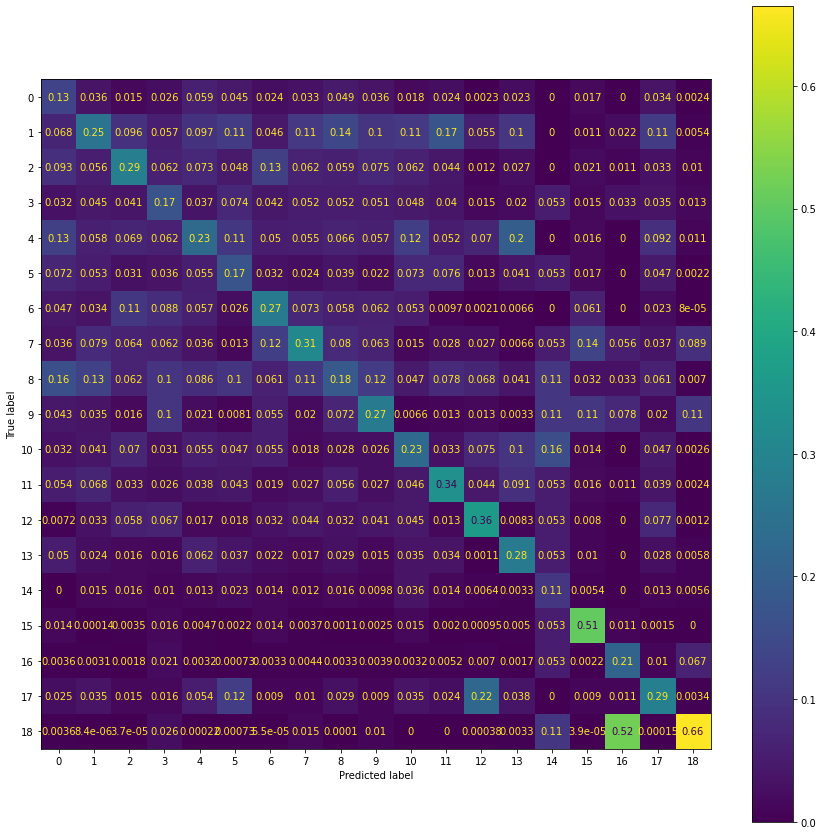

In [6]:
bc = BaggingClassifier(base_estimator=base_estimator,
                       n_estimators=200,
                       n_jobs=10,
                       verbose=1,
                       random_state=42)
bc = bc.fit(X_train, y_train)
print(bc.score(X_train, y_train))
print(bc.score(X_test, y_test))
plot_cm(bc, X_test, y_test)

In [17]:
x_test_ori = X_train_minmax.transform(X_test_ori[train_columns])
x_test_ori_full = imp_train.transform(x_test_ori)
x_test_ori_full = rs_train.transform(x_test_ori_full)

In [18]:
result = bc.predict(x_test_ori_full)
result_df = pd.DataFrame(result, columns=["TARGET"], index=X_test_ori.index)
result_df.index += 1
result_df['TARGET'] = result_df['TARGET'].map(inverse_target_map)

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:   44.1s remaining:  2.9min
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:   48.7s finished


In [19]:
result_df.to_csv("./result_2921.csv", index_label="ID")

## StackingClassifier

In [3]:
XY_train, X_test, inverse_target_map = get_data(min_size=None, min_size_test=None, nan_thresh=10, fill_nan=None)
train_columns = list(XY_train.columns)
train_columns.remove("TARGET_NUM")

min_max_scaler = MinMaxScaler(feature_range=(0, 10))
X_train_minmax = min_max_scaler.fit(XY_train[train_columns])
x_train = X_train_minmax.transform(XY_train[train_columns])

imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=-1)
imp_train = imp.fit(x_train)
x_train_full = imp_train.transform(x_train)

rs = RobustScaler()
rs_train = rs.fit(x_train)
x_train_full = rs_train.transform(x_train_full)

X_train, X_test, y_train, y_test = train_test_split(x_train_full, XY_train["TARGET_NUM"].values, test_size=0.3,
                                                    stratify=XY_train["TARGET_NUM"].values, random_state=42)

In [4]:
estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=42)), 
              ('svr', make_pipeline(StandardScaler(), LinearSVC(random_state=42)))]

sc = StackingClassifier(estimators=estimators,
                        final_estimator=LogisticRegression(),
                        n_jobs=10,
                        verbose=1)
sc = sc.fit(X_train, y_train)
print(sc.score(X_train, y_train))
print(sc.score(X_test, y_test))
plot_cm(sc, X_test, y_test)

KeyboardInterrupt: 